# 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)
from sklearn.decomposition import PCA
from umap import UMAP
import pylab as pl
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler, 
                                     ClusterCentroids,
                                     TomekLinks,
                                     NeighbourhoodCleaningRule,
                                     EditedNearestNeighbours,
                                     NearMiss)


from imblearn.over_sampling import (SMOTE,
                                    ADASYN)
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [16]:
df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [17]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [19]:
df.shape

(5110, 12)

In [20]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


<Axes: >

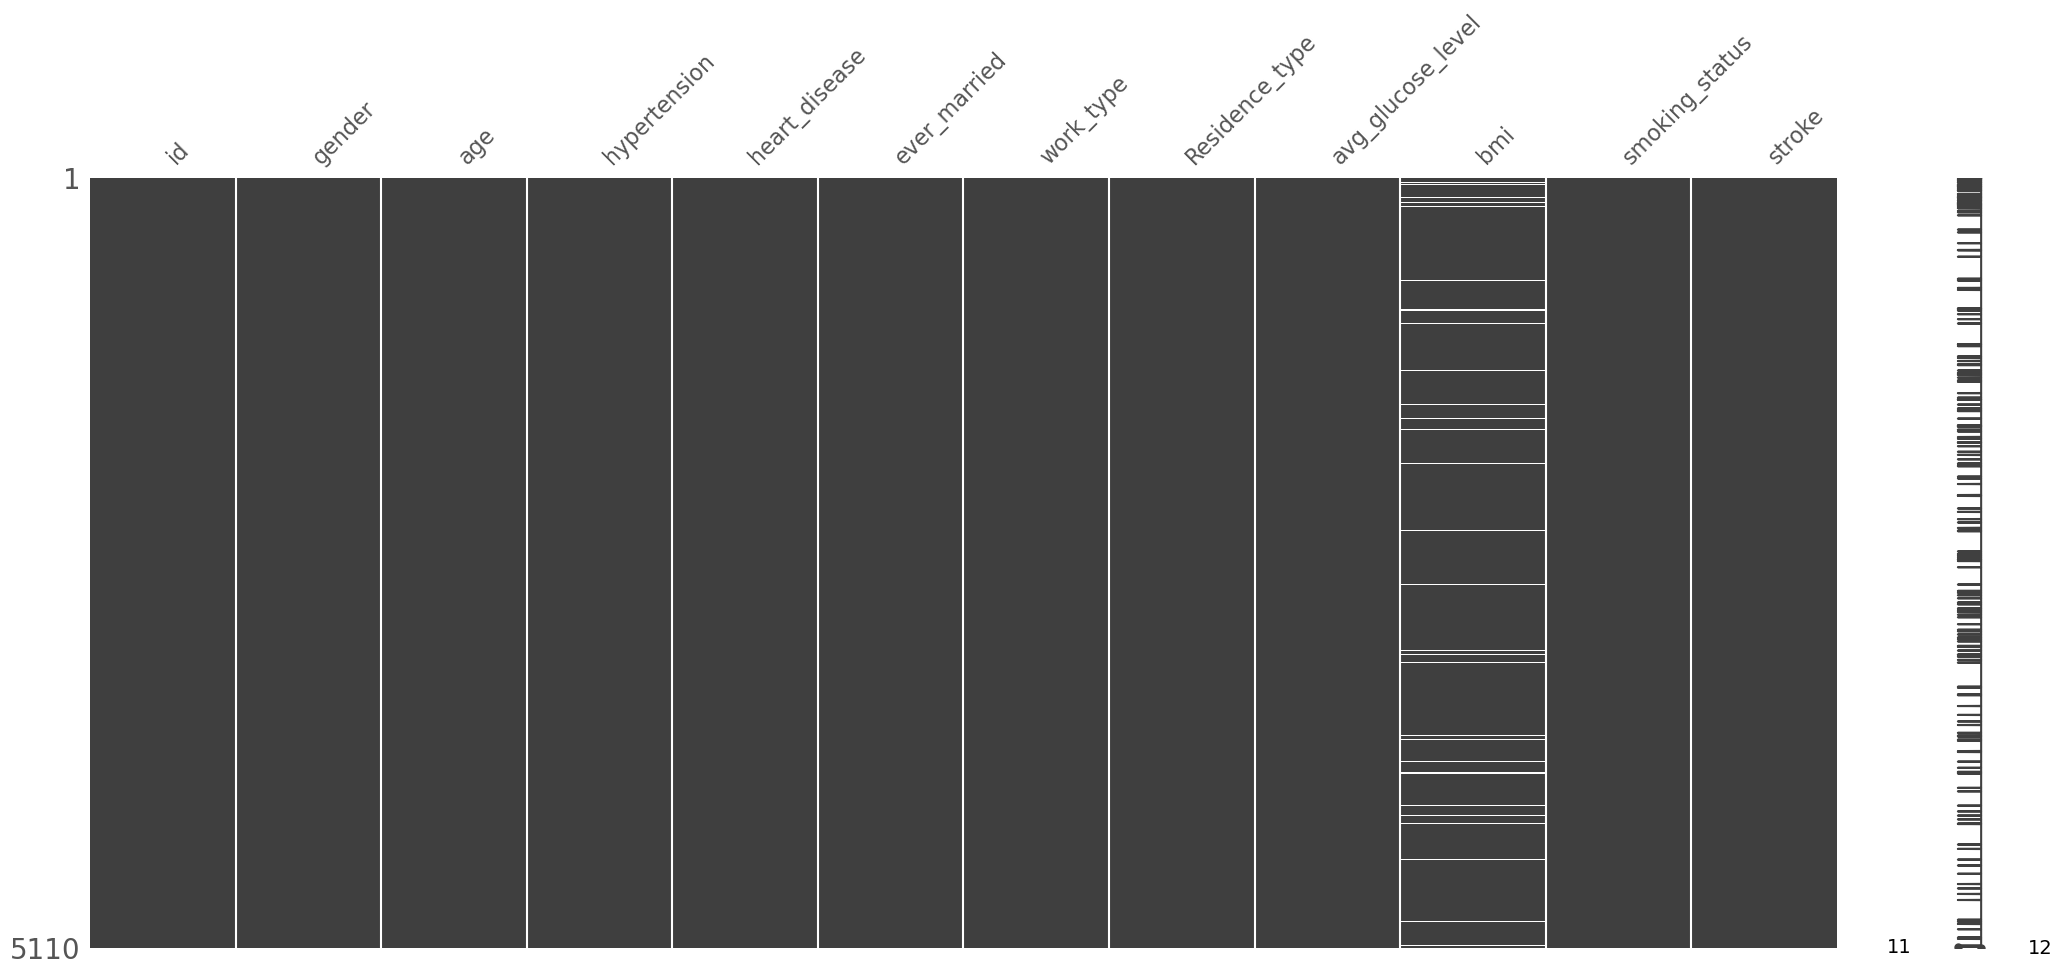

In [23]:
import missingno as msno

msno.matrix(df)

<Axes: >

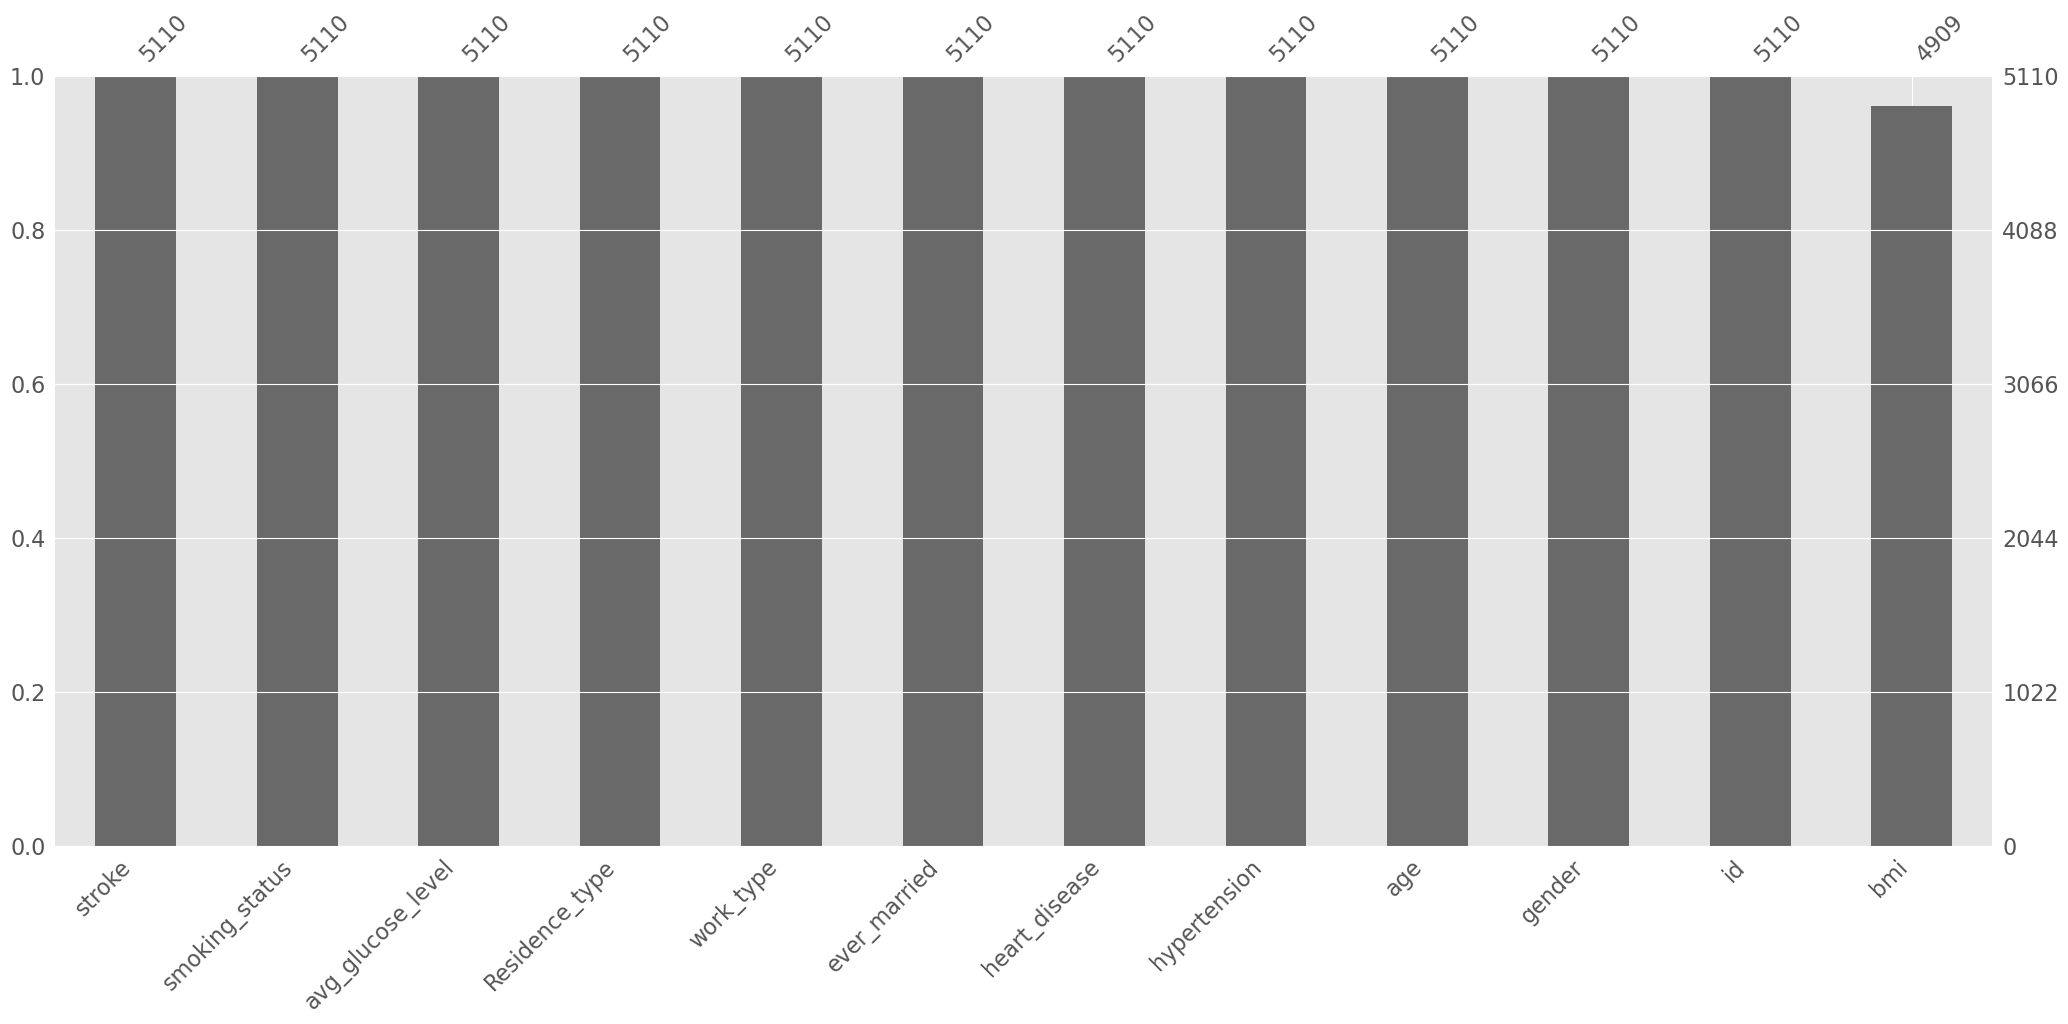

In [24]:
msno.bar(df, sort = 'descending')

In [25]:
df['bmi'].nunique()

418

In [26]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

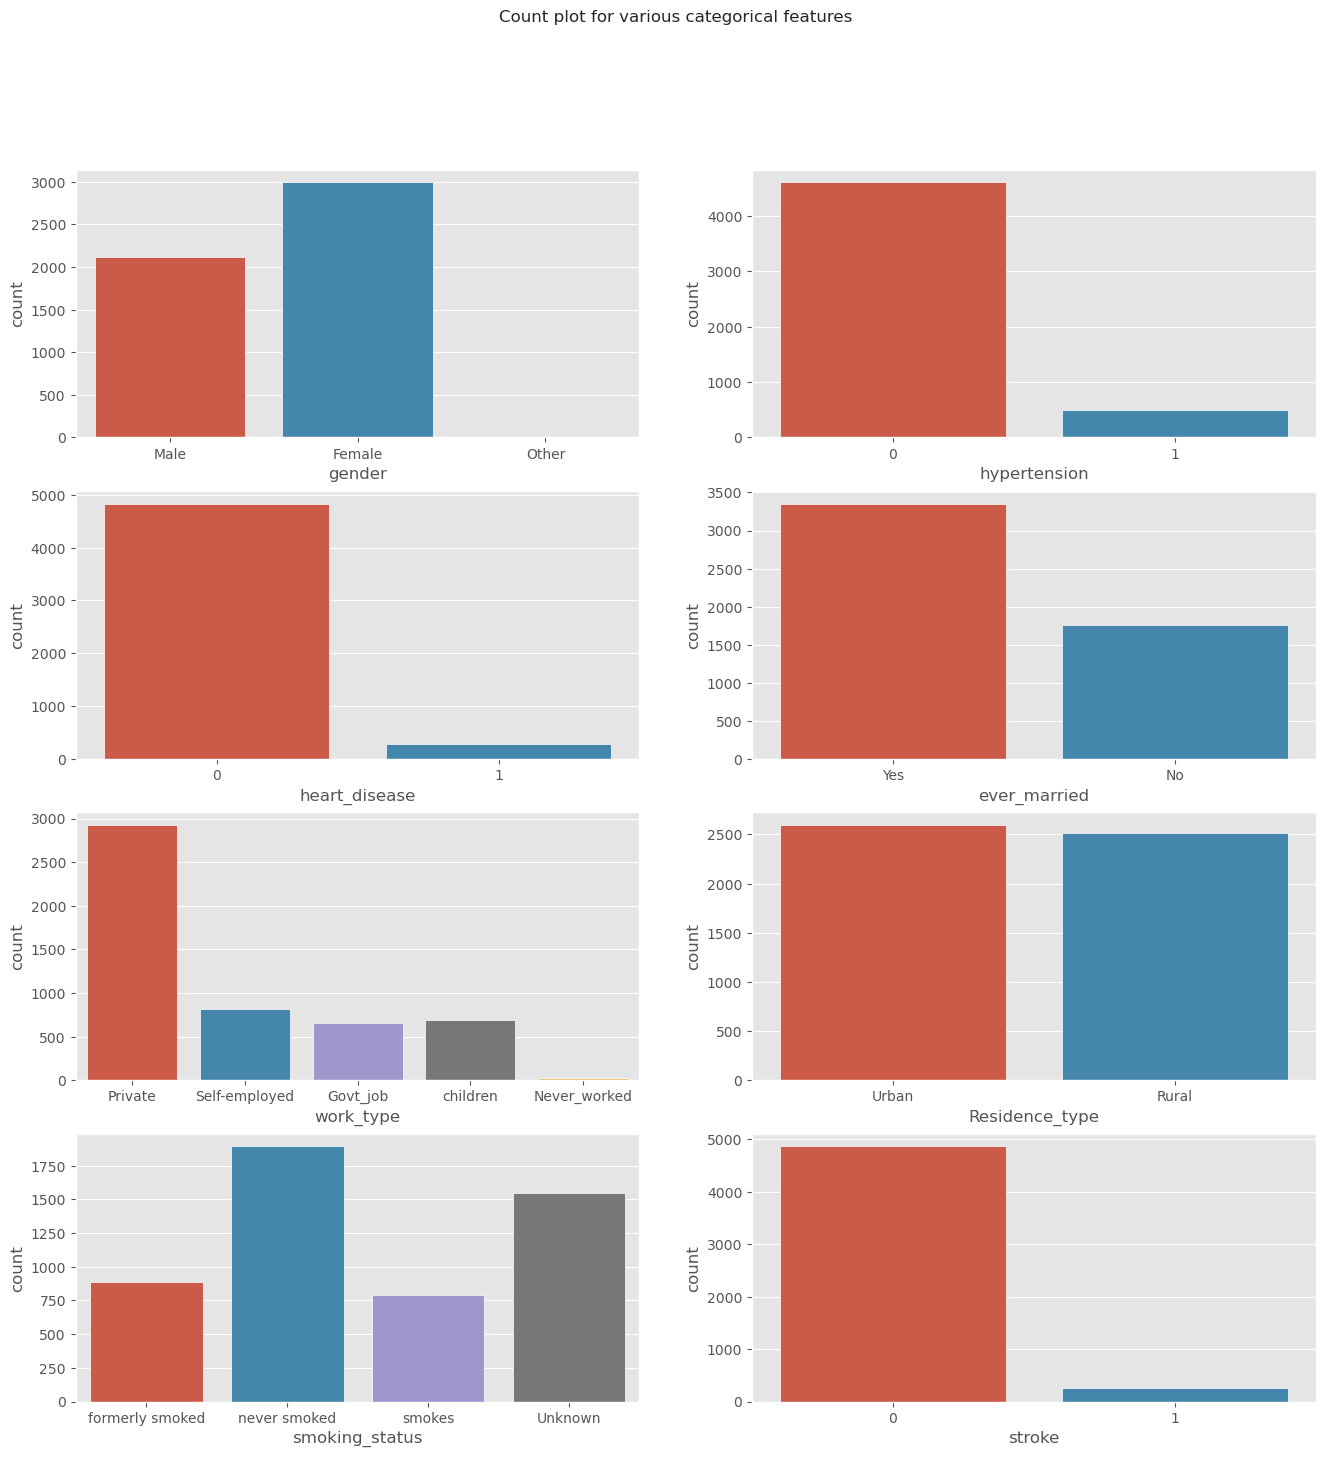

In [27]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Count plot for various categorical features")

sns.countplot(ax=axes[0,0],data=df,x='gender')
sns.countplot(ax=axes[0,1],data=df,x='hypertension')
sns.countplot(ax=axes[1,0],data=df,x='heart_disease')
sns.countplot(ax=axes[1,1],data=df,x='ever_married')
sns.countplot(ax=axes[2,0],data=df,x='work_type')
sns.countplot(ax=axes[2,1],data=df,x='Residence_type')
sns.countplot(ax=axes[3,0],data=df,x='smoking_status')
sns.countplot(ax=axes[3,1],data=df,x='stroke')

plt.show()

In [29]:
list_col=['smoking_status','work_type','Residence_type','gender']
for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SMOKING_STATUS :['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 
WORK_TYPE :['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked'] 
RESIDENCE_TYPE :['Urban' 'Rural'] 
GENDER :['Male' 'Female' 'Other'] 


In [30]:
fig = px.box(data_frame = df,
            x = "avg_glucose_level",
            width = 800,
            height = 300)
fig.update_layout({"template":"plotly_dark"})
fig.show()

In [31]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])

<Axes: xlabel='stroke', ylabel='count'>

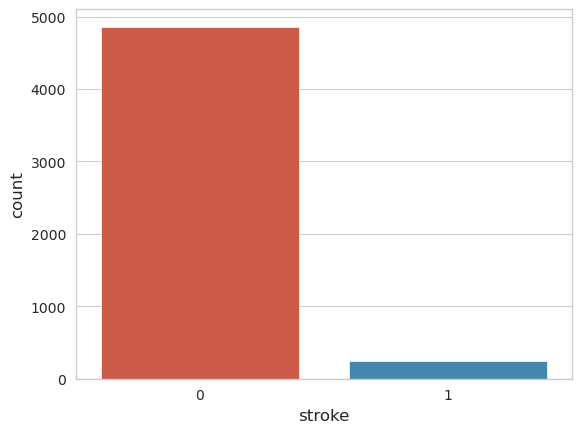

In [32]:
sns.countplot(x='stroke', data=df)

In [33]:
cat_cols = ["gender","hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status","stroke"]
cont_cols = ["age","avg_glucose_level","bmi"]

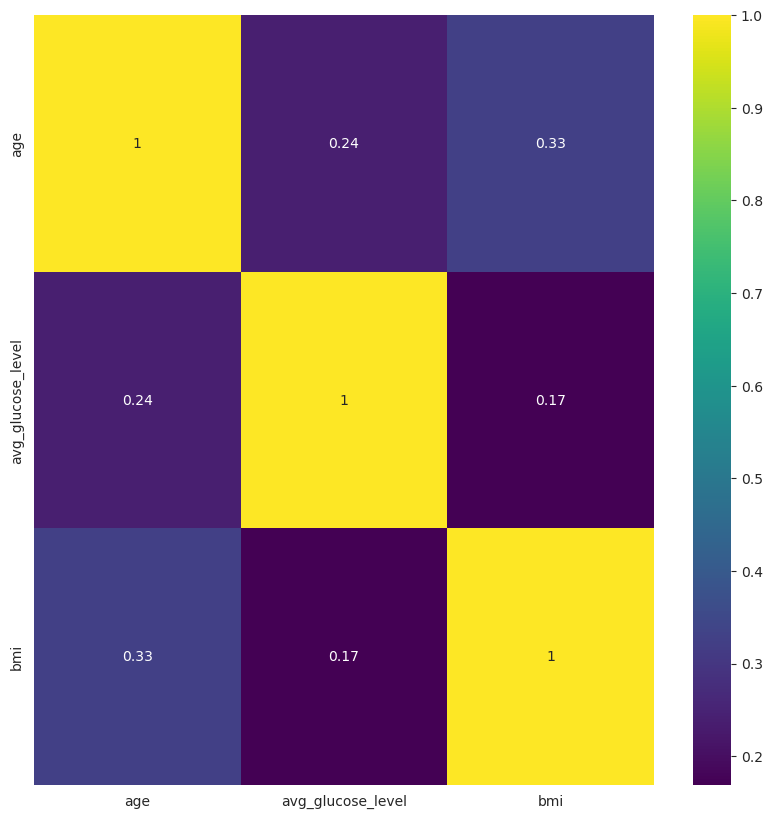

In [34]:
cr = df[cont_cols].corr()
plt.figure(figsize = (10,10))
sns.heatmap(cr,cmap="viridis", annot = True)
plt.show()

In [35]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['Red']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.show()

In [36]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [37]:
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [38]:
print("The shape before removing the BMI outliers : ",df.shape)
df.drop(df[df['bmi'] > 47].index, inplace = True)
print("The shape after removing the BMI outliers : ",df.shape)

The shape before removing the BMI outliers :  (5109, 15)
The shape after removing the BMI outliers :  (4992, 15)


In [39]:
bmi = list(df['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
colors = ['Red']
fig = ff.create_distplot(hist_data,group_labels,show_hist = True,colors=colors)
fig.show()

In [40]:
from sklearn.preprocessing import LabelEncoder
object_cols = ["gender","ever_married","work_type","Residence_type","smoking_status"]
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [41]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,Obesity,Elderly,High
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,Overweight,Elderly,High
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,Obesity,Elderly,Normal
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,Obesity,Mid Adults,High
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,Ideal,Elderly,High


In [44]:
df.drop(['bmi_cat', 'age_cat', 'glucose_cat'], axis=1, inplace=True)

KeyError: "['bmi_cat', 'age_cat', 'glucose_cat'] not found in axis"

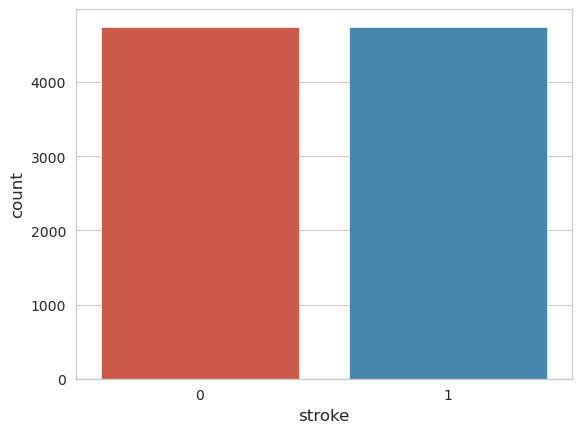

In [45]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 42)
X = df.drop(['stroke'],axis=1)
y = df[['stroke']]
X,y= sampler.fit_resample(X,y['stroke'].values.ravel())
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

In [46]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [47]:
df = pd.concat([X,y],axis = 1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [48]:
X = df.drop('stroke', axis=1)
y = df['stroke']
X_encoded = pd.get_dummies(X, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
xgb_classifier = xgb.XGBClassifier()
lgb_classifier = lgb.LGBMClassifier()
catboost_classifier = CatBoostClassifier()


In [57]:
voting_classifier = VotingClassifier(
    estimators=[
        ('xgb', xgb_classifier),
        ('lgb', lgb_classifier),
        ('catboost', catboost_classifier)
    ],
    voting='soft'  # You can use 'hard' or 'soft' voting
)
voting_classifier.fit(X_train, y_train)

Learning rate set to 0.024483
0:	learn: 0.6741786	total: 60.3ms	remaining: 1m
1:	learn: 0.6583320	total: 64ms	remaining: 31.9s
2:	learn: 0.6430740	total: 67.3ms	remaining: 22.4s
3:	learn: 0.6249560	total: 70.6ms	remaining: 17.6s
4:	learn: 0.6108978	total: 74.2ms	remaining: 14.8s
5:	learn: 0.5959068	total: 77.7ms	remaining: 12.9s
6:	learn: 0.5835714	total: 81ms	remaining: 11.5s
7:	learn: 0.5687584	total: 84.3ms	remaining: 10.5s
8:	learn: 0.5573297	total: 87.8ms	remaining: 9.66s
9:	learn: 0.5464162	total: 91.6ms	remaining: 9.06s
10:	learn: 0.5368386	total: 94.9ms	remaining: 8.53s
11:	learn: 0.5276961	total: 98.4ms	remaining: 8.1s
12:	learn: 0.5174173	total: 102ms	remaining: 7.72s
13:	learn: 0.5099202	total: 105ms	remaining: 7.41s
14:	learn: 0.5018850	total: 109ms	remaining: 7.13s
15:	learn: 0.4920454	total: 112ms	remaining: 6.89s
16:	learn: 0.4853624	total: 116ms	remaining: 6.69s
17:	learn: 0.4784501	total: 119ms	remaining: 6.5s
18:	learn: 0.4733370	total: 123ms	remaining: 6.33s
19:	lear

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('lgb', LGBMClassifier()),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7867a59458a0>)],
                 voting='soft')

In [58]:
y_pred = voting_classifier.predict(X_test)

In [59]:
train_accuracy = voting_classifier.score(X_train, y_train)
print(f"Training Accuracy of Voting Classifier is {train_accuracy:.2f}")

Training Accuracy of Voting Classifier is 0.99


In [60]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of Voting Classifier is {test_accuracy:.2f}")

Test Accuracy of Voting Classifier is 0.95


In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :-")
print(conf_matrix)

Confusion Matrix :-
[[910  48]
 [ 41 900]]


In [62]:
class_report = classification_report(y_test, y_pred)
print("Classification Report :-")
print(class_report)

Classification Report :-
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       958
           1       0.95      0.96      0.95       941

    accuracy                           0.95      1899
   macro avg       0.95      0.95      0.95      1899
weighted avg       0.95      0.95      0.95      1899

